In [854]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random


In [995]:
#specify true probabilities for each game
import numpy as np

pA = round(np.random.random(), 1)
pB = round(np.random.random(), 1)
pC = round(np.random.random(), 1)

p=[pA,pB,pC]
print(p)

[0.4, 0.0, 0.4]
[0.1, 0.5, 0.9]


[1, 1, 1]
[1, 1, 1]


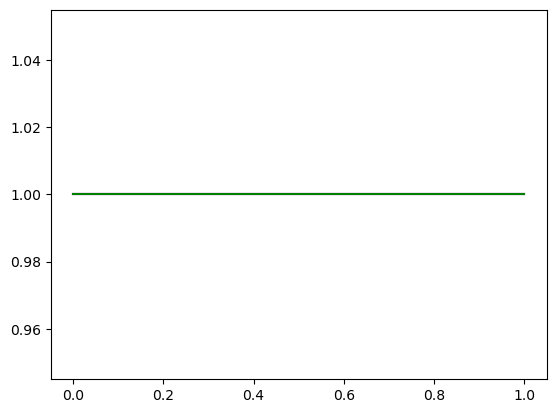

In [996]:
#set prior as a beta distribution with alpha=beta=1, equavalent to a uniform distribution. 

#use array to represent the triplets of alpha and beta, representing parameters for three games. 
alpha = [1,1,1]
beta = [1,1,1]

parameter_domain = np.linspace(0,1,101)


# for future update, I created a function to increase efficiency
# The priors are named as posterior_j, as their value will be updated by posteriors

posterior_A = stats.beta(alpha[0], beta[0])
posterior_B = stats.beta(alpha[1], beta[1])
posterior_C = stats.beta(alpha[2], beta[2])

def update_posteriors():
    print(alpha)
    print(beta)

    posterior_A = stats.beta(alpha[0], beta[0])
    posterior_B = stats.beta(alpha[1], beta[1])
    posterior_C = stats.beta(alpha[2], beta[2])
    
    plt.plot(parameter_domain, posterior_A.pdf(parameter_domain), label='Posterior A', color='red')
    plt.plot(parameter_domain, posterior_B.pdf(parameter_domain), label='Posterior B', color='blue')
    plt.plot(parameter_domain, posterior_C.pdf(parameter_domain), label='Posterior C', color='green')
    return posterior_A,posterior_B,posterior_C

    
    
posterior_A,posterior_B,posterior_C=update_posteriors()



In [997]:
#sample from all all three priors/posteriors

def sample_posteriors(posterior_A,posterior_B,posterior_C):

    sample_A = posterior_A.rvs()
    sample_B = posterior_B.rvs()
    sample_C = posterior_C.rvs()
    print("Three samples from posteriors",sample_A, sample_B, sample_C)
    max_sample = max(sample_A, sample_B, sample_C)
    if max_sample == sample_A:
        game=0
    elif max_sample == sample_B:
        game=1
    else:
        game=2
    return game
    
game=sample_posteriors(posterior_A,posterior_B,posterior_C)

Three samples from posteriors 0.1601536177979615 0.11801571904262324 0.8825289322894886


I won 9 out of 10 games in C
[1, 1, 10]
[1, 1, 2]


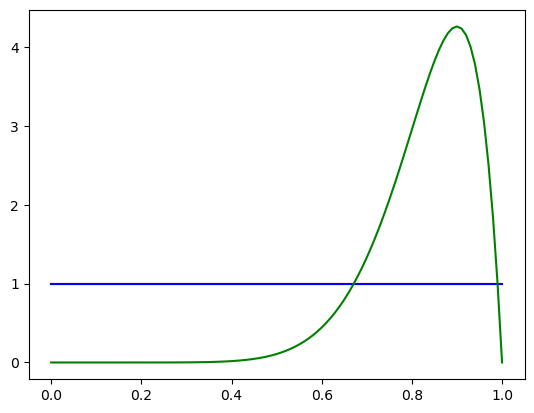

In [998]:
game_array=["A","B","C"]
def play_games(game):
    outcome=stats.binom(n=10,p=p[game]).rvs(random_state=28)
    print("I won",outcome, "out of 10 games in", game_array[game])
    alpha[game]=outcome+alpha[game]
    beta[game]=n-outcome+beta[game]

alpha=[1,1,1]
beta=[1,1,1]
play_games(game)
posterior_A,posterior_B,posterior_C=update_posteriors()

Three samples from posteriors 0.04512309040522646 0.3050518121972983 0.9509351787832374
I won 9 out of 10 games in C
[1, 1, 19]
[1, 1, 3]


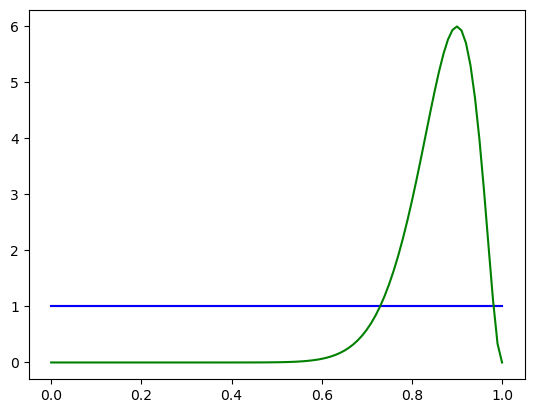

In [999]:
#repeat the process above
game=sample_posteriors(posterior_A,posterior_B,posterior_C)
play_games(game)
posterior_A,posterior_B,posterior_C=update_posteriors()



Three samples from posteriors 0.8877439355498844 0.5297343043227315 0.812535404480329
I won 1 out of 10 games in A
[2, 1, 19]
[10, 1, 3]


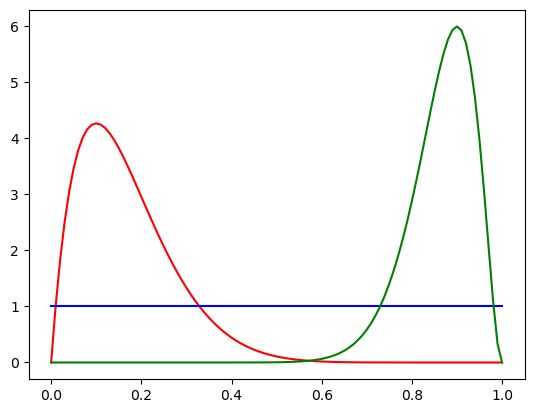

In [1000]:
#repeat the process above
game=sample_posteriors(posterior_A,posterior_B,posterior_C)
play_games(game)
posterior_A,posterior_B,posterior_C=update_posteriors()


Three samples from posteriors 0.10740782356911818 0.08650389178069932 0.9399508960729018
I won 9 out of 10 games in C
[2, 1, 28]
[10, 1, 4]


(<scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1fc2918050>,
 <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1fc27bd450>)

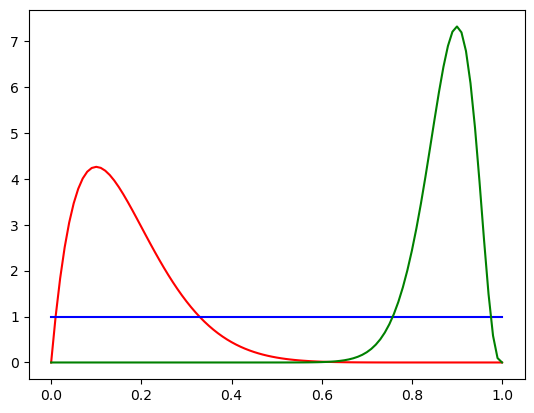

In [1001]:
#repeat the process above
game=sample_posteriors(posterior_A,posterior_B,posterior_C)
play_games(game)
update_posteriors()

Three samples from posteriors 0.17269682027438268 0.3370304692641783 0.9729546719577586
I won 9 out of 10 games in C
[2, 1, 37]
[10, 1, 5]


(<scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1fc28dd290>,
 <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1fc3683b10>)

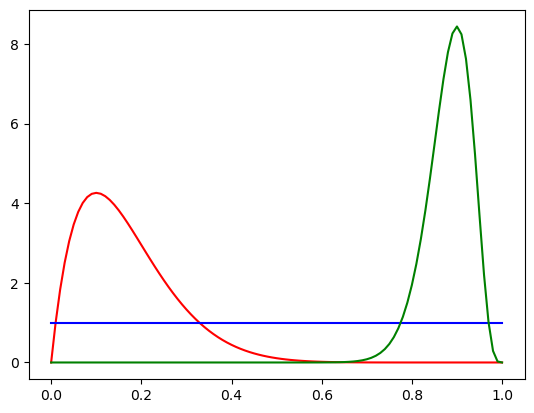

In [1002]:
#repeat the process above
game=sample_posteriors(posterior_A,posterior_B,posterior_C)
play_games(game)
update_posteriors()



Three samples from posteriors 0.29500447586721024 0.8901358001697907 0.9055885102478934
I won 9 out of 10 games in C
[2, 19, 217]
[10, 13, 25]


(<scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1fc28fd650>,
 <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f1fc1f01910>)

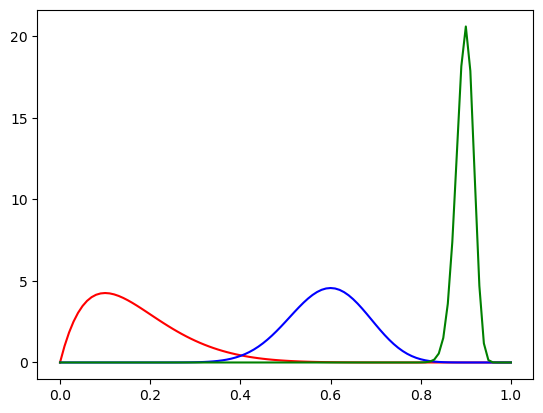

In [1025]:
#repeat the process above
game=sample_posteriors(posterior_A,posterior_B,posterior_C)
play_games(game)
update_posteriors()



[0.4, 0.8, 0.6]
